In [ ]:
from __future__ import print_function
import argparse
import cv2 
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import imutils

Rotation

In [ ]:
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/Nature.jpg")

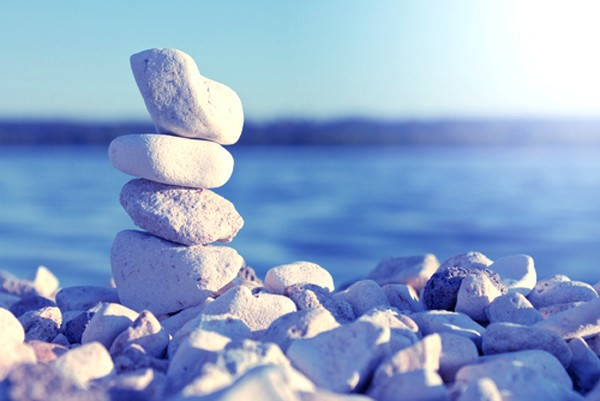

In [ ]:
cv2_imshow(img)

In [ ]:
(b,g,r) = img[0,0]
img[0,0]

array([222, 202, 145], dtype=uint8)

In [ ]:
print('red:{} green:{} blue:{}'.format(r,g,b))

red:145 green:202 blue:222


In [ ]:
(h,w) = img.shape[:2]
centre = (w//2,h//2)


Rotated by 45 degrees


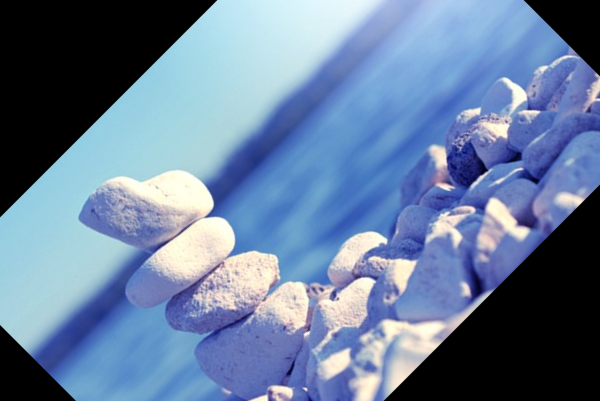

In [ ]:
M = cv2.getRotationMatrix2D(centre,45,1.0)
rotated = cv2.warpAffine(img,M,(w,h))
print("Rotated by 45 degrees")
cv2_imshow(rotated)


Rotated by -90 degrees


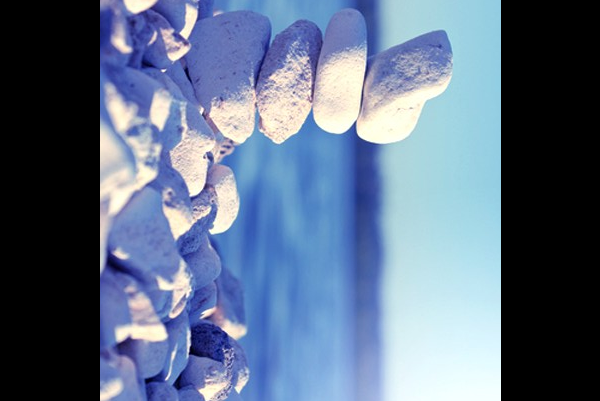

In [ ]:
M = cv2.getRotationMatrix2D(centre,-90,1.0)
rotated = cv2.warpAffine(img,M,(w,h))
print("Rotated by -90 degrees")
cv2_imshow(rotated)

In [ ]:
#Lets define a function for this activity



In [ ]:
def rotate(image,angle,centre=None,scale=1.0):
  (h,w) = image.shape[:2]

  if centre is None:
    centre = (w//2,h//2)

  M = cv2.getRotationMatrix2D(centre,angle,scale)
  rotated = cv2.warpAffine(image,M,(w,h))
  return rotated



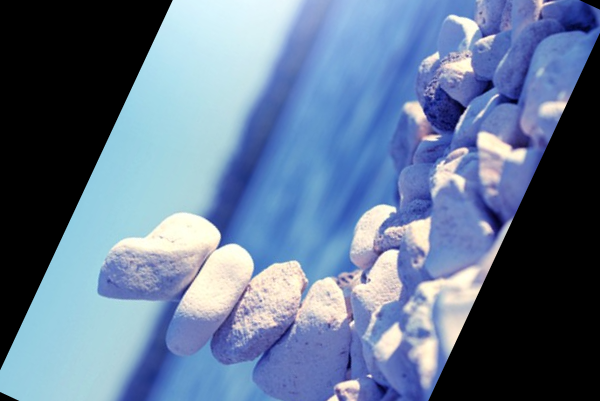

In [ ]:
rotated = imutils.rotate(img,65)
cv2_imshow(rotated)

Resizing

In [ ]:
r = 150.0/ img.shape[1]
dim = (150,int(img.shape[0]*r))

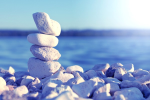

In [ ]:
resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

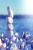

In [ ]:
r = 50.0/ img.shape[1]
dim = (int(img.shape[0]*r),50)
resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

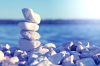

In [ ]:
resized = imutils.resize(img,width=100,height=50)
cv2_imshow(resized)

In [ ]:
#Lets define a resizing function

def resize(image,width=None,height=None,inter=cv2.INTER_AREA):
  dim = None
  (h,w) = image.shape[:2]

  if width is None and height is None:
    return image

  if width is None:
    r = height / float(h)
    dim = (int(w*r),height)

  else:
    r= width/float(w)
    dim = (width,int(h*r))

  resized = cv2.resize(image,dim,interpolation = inter) 
  return resized 



In [ ]:
resized = resize(img,500,300)

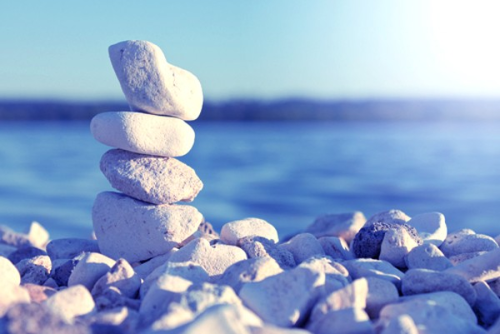

In [ ]:
cv2_imshow(resized)

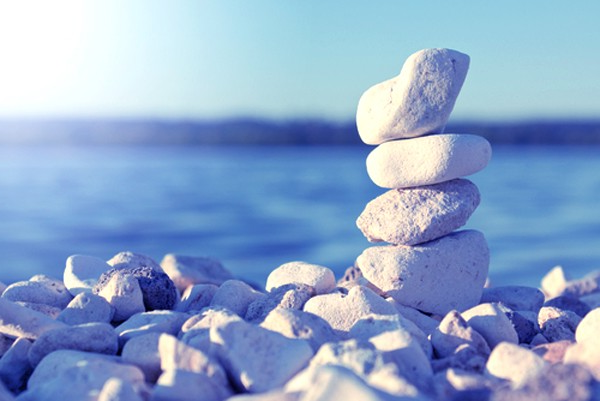

In [ ]:
#Flipping

flipped = cv2.flip(img,1)
cv2_imshow(flipped)

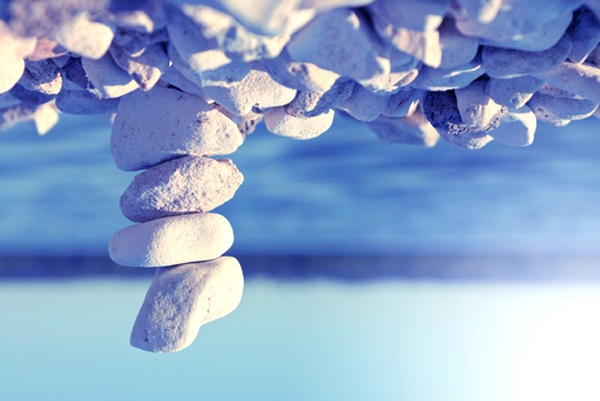

In [ ]:

flipped = cv2.flip(img,0)
cv2_imshow(flipped)

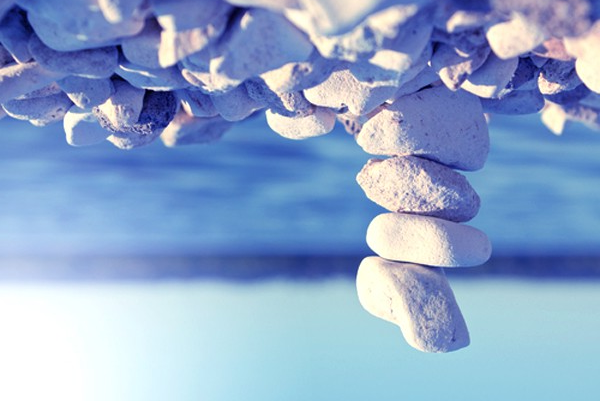

In [ ]:
flipped = cv2.flip(img,-1)
cv2_imshow(flipped)

Cropping

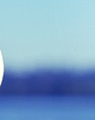

In [ ]:
import numpy as np
import cv2

cropped = img[50:170,240:335]
cv2_imshow(cropped)


Image Arithematics

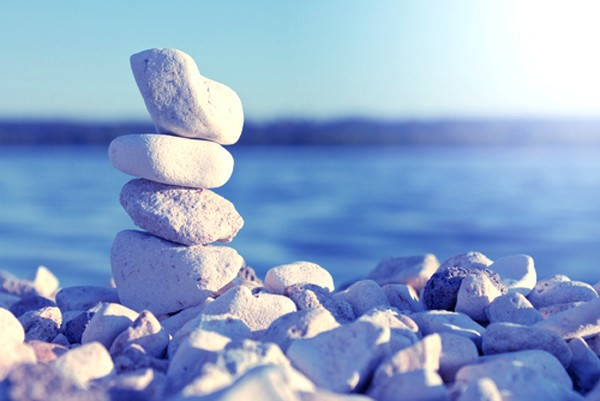

In [ ]:
cv2_imshow(img)

In [ ]:
print('Max of 255:{}'.format(cv2.add(np.uint8([200]),np.uint8([100]))))
print('Min of 0:{}'.format(cv2.subtract(np.uint8([50]),np.uint8([100]))))
print('Wrap around:{}'.format(np.uint8([200])+np.uint8([100])))
print('Min of 0:{}'.format(np.uint8([50])-np.uint8([100])))

Max of 255:[[255]]
Min of 0:[[0]]
Wrap around:[44]
Min of 0:[206]


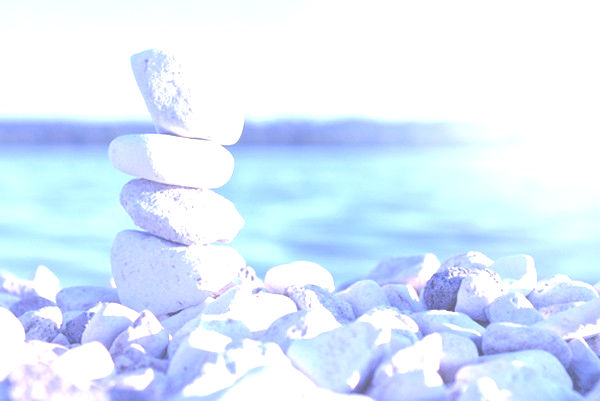

In [ ]:
M = np.ones(img.shape,dtype="uint8")*100
added = cv2.add(img,M)
cv2_imshow(added)


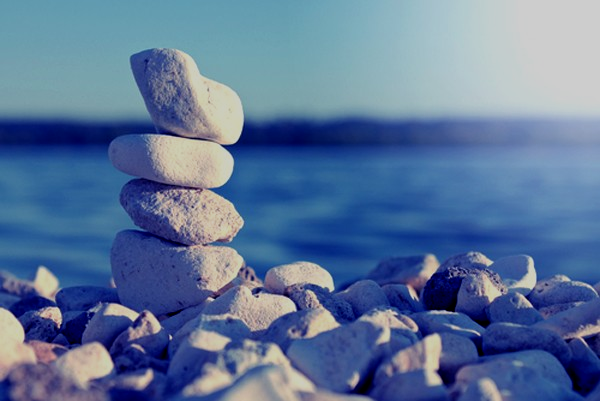

In [ ]:
M = np.ones(img.shape,dtype="uint8")*50
subtracted = cv2.subtract(img,M)
cv2_imshow(subtracted)

Bitwise Operations

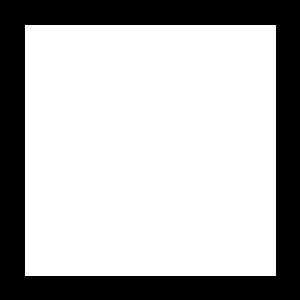

In [37]:
rectangle = np.zeros((300,300),dtype='uint8')
cv2.rectangle(rectangle,(25,25),(275,275),255,-1)
cv2_imshow(rectangle)

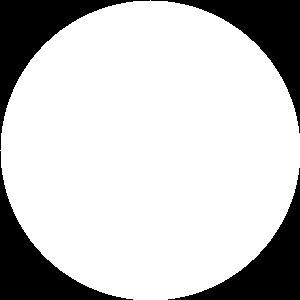

In [38]:
circle = np.zeros((300,300),dtype="uint8")
cv2.circle(circle,(150,150),150,255,-1)
cv2_imshow(circle)

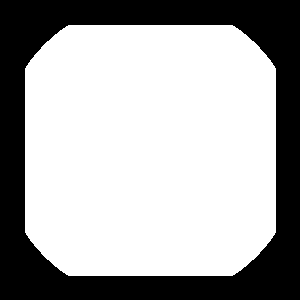

In [39]:
#Bitwise operation
#And
bitwiseAnd = cv2.bitwise_and(rectangle,circle)
cv2_imshow(bitwiseAnd)

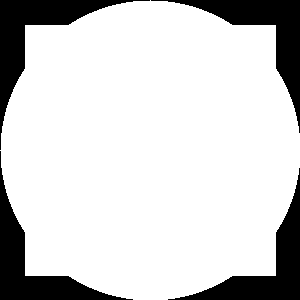

In [40]:
#OR
bitwiseOR = cv2.bitwise_or(rectangle,circle)
cv2_imshow(bitwiseOR)

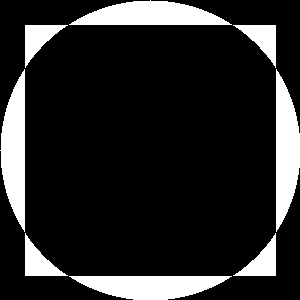

In [41]:
#XOR
bitwiseXOR = cv2.bitwise_xor(rectangle,circle)
cv2_imshow(bitwiseXOR)

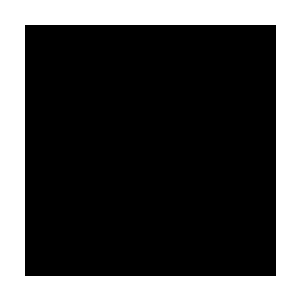

In [42]:
#Not
#OR
bitwiseNot = cv2.bitwise_not(rectangle,circle)
cv2_imshow(bitwiseNot)

Masking

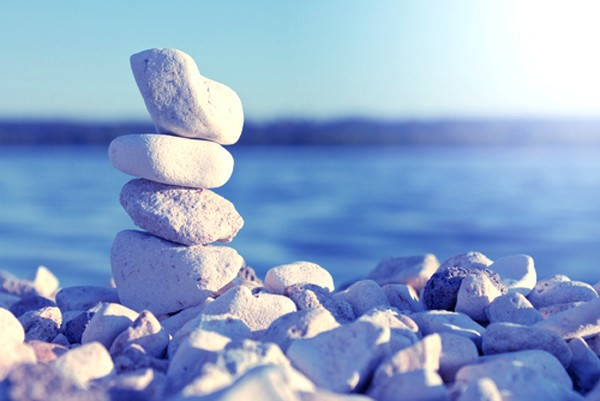

In [43]:
cv2_imshow(img)

In [49]:
img.shape

(401, 600, 3)

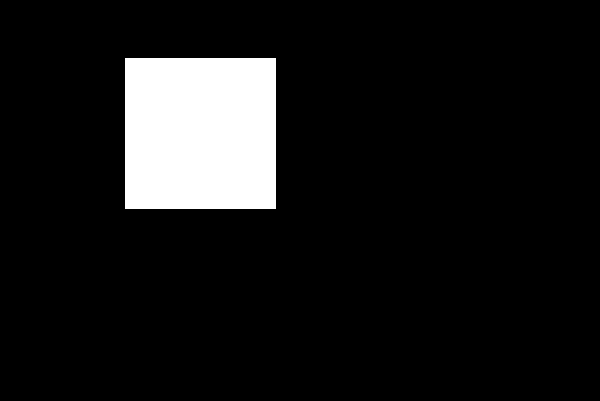

In [54]:
# We just want to the stone petals area from our image

mask = np.zeros(img.shape[:2],dtype="uint8")
(cX,cY) = (img.shape[1]//3,img.shape[0]//3)
cv2.rectangle(mask,(cX-75,cY-75),(cX+75,cY+75),255,-1)
cv2_imshow(mask)



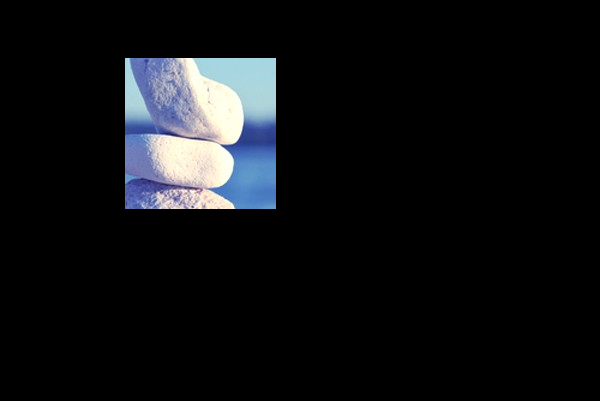

In [55]:
masked = cv2.bitwise_and(img,img,mask=mask)
cv2_imshow(masked)

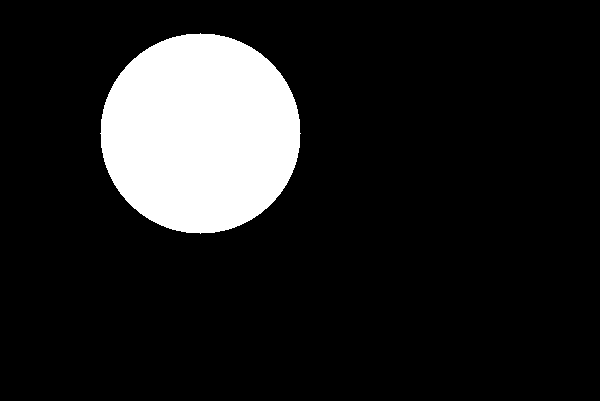

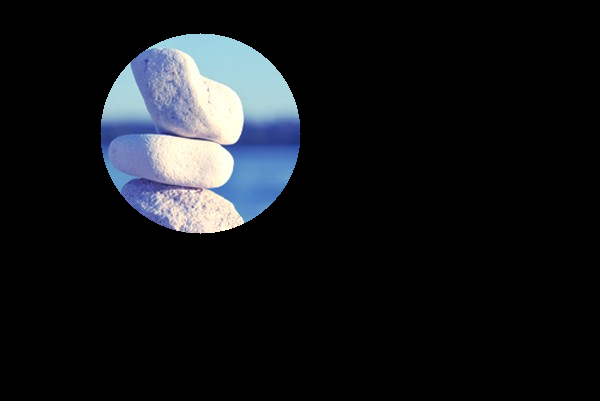

In [56]:
#Masking with a circle
mask = np.zeros(img.shape[:2],dtype='uint8')
cv2.circle(mask,(cX,cY),100,255,-1)
masked = cv2.bitwise_and(img,img,mask=mask)
cv2_imshow(mask) 
cv2_imshow(masked)

Splitting and merging channels

In [57]:
(B,G,R) = cv2.split(img)

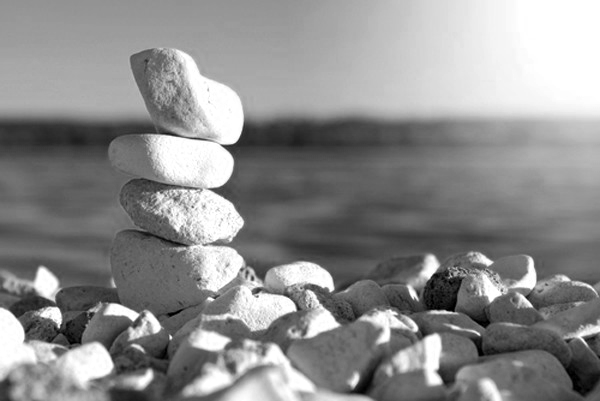

In [58]:
cv2_imshow(R)

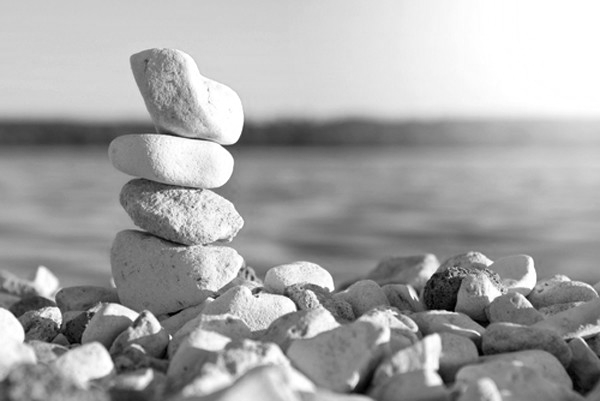

In [59]:
cv2_imshow(G)

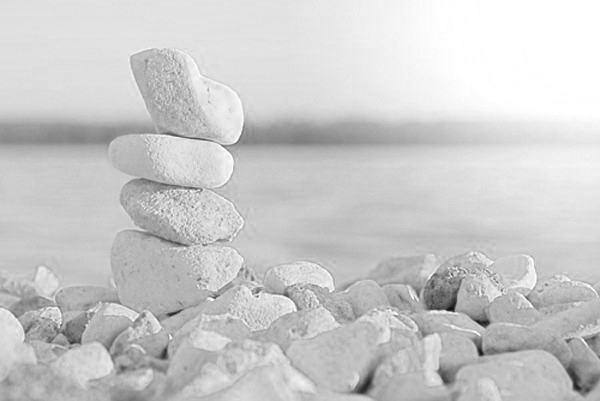

In [60]:
cv2_imshow(B)

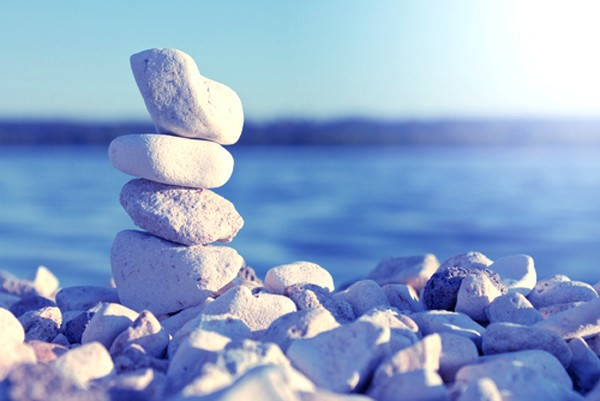

In [61]:
merged = cv2.merge([B,G,R])
cv2_imshow(merged)

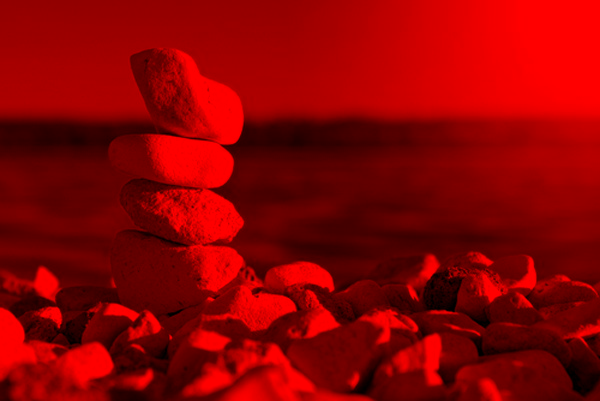

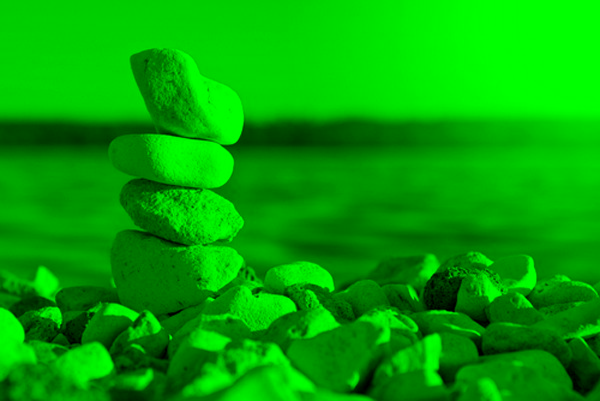

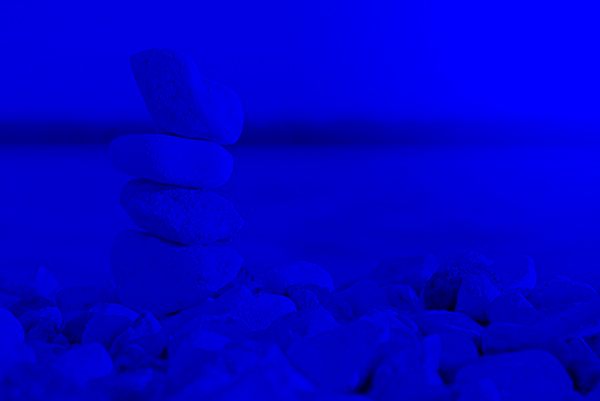

In [62]:
zeros = np.zeros(img.shape[:2],dtype="uint8")
cv2_imshow(cv2.merge([zeros,zeros,R]))
cv2_imshow(cv2.merge([zeros,G,zeros]))
cv2_imshow(cv2.merge([B,zeros,zeros]))

Color Spaces

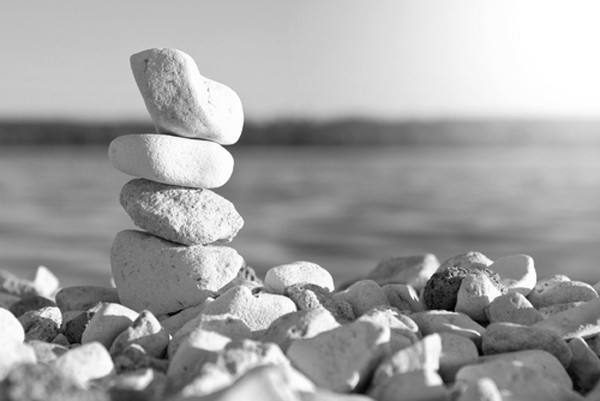

In [63]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

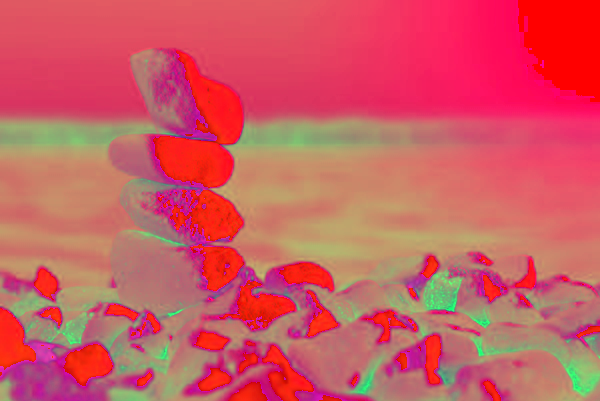

In [64]:
HSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2_imshow(HSV)

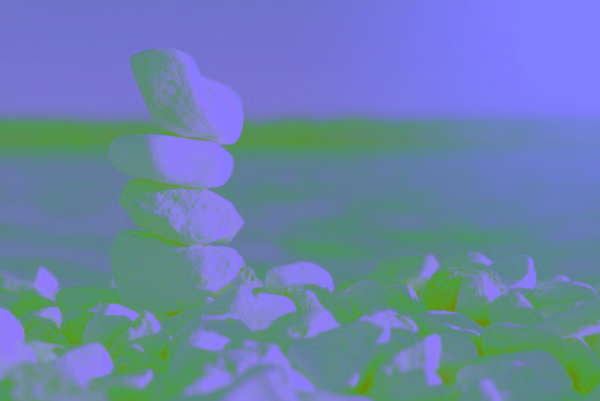

In [65]:
LAB = cv2.cvtColor(img,cv2.COLOR_BGR2Lab)
cv2_imshow(LAB)